<a href="https://colab.research.google.com/github/btown29/CeazametAnalysis/blob/main/PipelineCeazametBryanTownsend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Idea preliminar de Proyecto

Trabajar con los datos del Ceazamet con el objetivo de determinar relaciones existentes entre las estaciones de monitoreo para alguna variable climatológica en específico. (En este ejemplo, la temperatura)

 **Pregunta:** ¿La evolución de la temperatura durante el día es la misma para cada estación de monitoreo?

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.basemap import Basemap
%matplotlib inline
from datetime import datetime
import seaborn
import os
import glob
import datetime as dt
#!apt-get install libgeos-3.5.0
#!apt-get install libgeos-dev
#!pip install https://github.com/matplotlib/basemap/archive/master.zip
#!pip install pyproj==1.9.6


# Datos

La obtención de los datos se realizó de manera manual utilizando el formulario de descargas del sitio del Ceazamet [ceazamet.cl](https://)

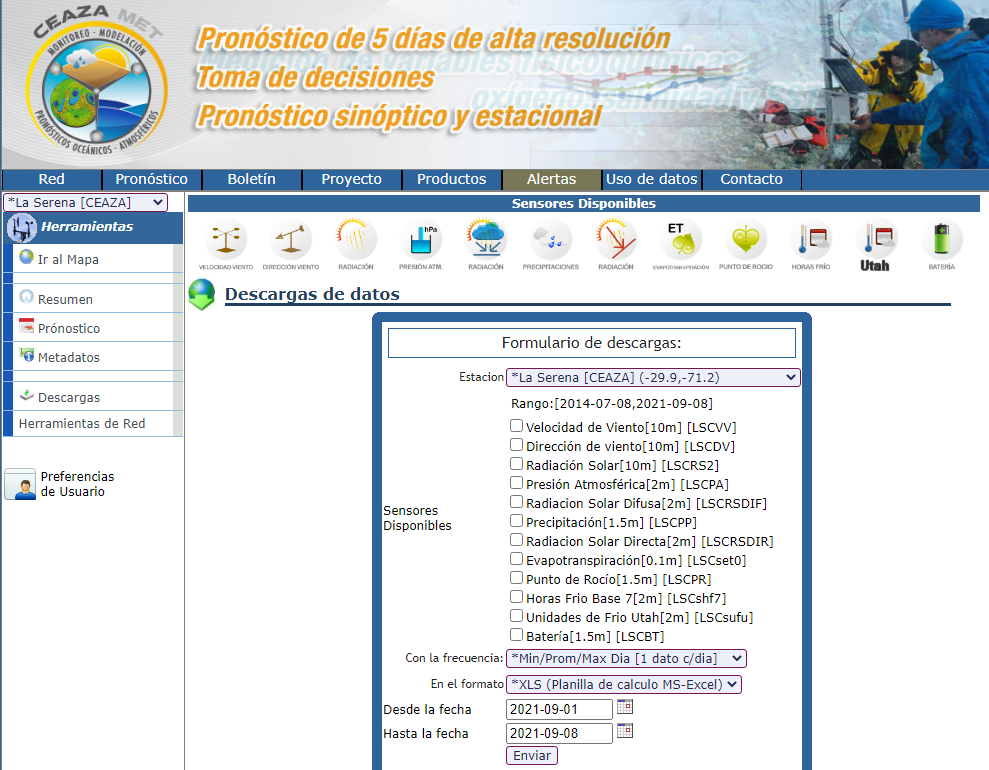

En esta tarea he decidido trabajar con 24 estaciones de monitoreo, las cuales almaceno en una lista

In [24]:
lista_estaciones = ["Andacollo [[]Collowara[]]", "Coquimbo [[]El Panul[]]", "El Jote", "El Tapado", "Estero Derecho", "Gabriela Mistral", "La Laguna [[]Elqui[]]",
                    "La Polvareda [[]INIA[]]", "La Serena [[]CEAZA[]]", "La Serena [[]Cerro Grande[]]", "La Serena [[]El Romeral[]]",
                    "Las Cardas", "Llano de Las Liebres", "Llanos de Huanta", "Los Corrales", "Pan de Azúcar", "Paso Agua Negra",
                    "Pisco Elqui", "Punta Colorada", "Punta de Choros", "Rivadavia", "Tongoy Balsa CMET", "UCN Guayacan", "Vicuña"]

# Limpieza de Datos

La limpieza de datos empieza desde el momento de carga de los datos, esto debido a las opciones que entrega el metodo read_excel(), el cual permite elegir como deseo que se cargen los datos a un dataframe

In [25]:
# Creacion DataFrames

estacionesDataFrames = []
for estacion in lista_estaciones:
  files = glob.glob('/content/drive/MyDrive/Electivo Python/Datos/Ceazamet/Datos/Estación '+ estacion + '/*')
  df_aux = pd.DataFrame()
  archivo_estaciones = []
  for file in files:
    df = pd.read_excel(file, skiprows=3, skipfooter=4)
    df['estacion'] = estacion
    archivo_estaciones.append(df)
  df_aux = pd.concat(archivo_estaciones)
  estacionesDataFrames.append(df_aux)


WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
*** No CODEPAGE record, no encoding_override: will use 'ascii'
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
*** No CODEPAGE record, no encoding_override: will use 'ascii'
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
*** No CODEPAGE record, no encoding_override: will use 'ascii'
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
*** No CODEPAGE record, no encoding_override: will use 'ascii'
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
*** No CODEPAGE record, no encoding_override: will use 'ascii'
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
*** No CODEPAGE record, no encoding_override: will use 'ascii'
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
*** No CODEPAGE record, no encoding_override: will use 'ascii'
WARNING *** OLE2 inconsistency: SSCS size is 0 b

Mediante el metodo head() puedo realizar una primera inspección con algunas de las dificultades que presentan estos datos

In [26]:
estacionesDataFrame = estacionesDataFrames.copy()
estacionesDataFrame[0].head(3)

,Unnamed: 0,[Min] Â°C Temperatura del Aire[1.5m],[Prom] Â°C Temperatura del Aire[1.5m],[Max] Â°C Temperatura del Aire[1.5m],[%Datos] Temperatura del Aire[1.5m],[Min] % Humedad Relativa[1.5m],[Prom] % Humedad Relativa[1.5m],[Max] % Humedad Relativa[1.5m],[%Datos] Humedad Relativa[1.5m],[Min] m/s Velocidad de Viento[5m],[Prom] m/s Velocidad de Viento[5m],[Max] m/s Velocidad de Viento[5m],[%Datos] Velocidad de Viento[5m],[Min] Â° DirecciÃ³n de viento[5m],[Prom] Â° DirecciÃ³n de viento[5m],[Max] Â° DirecciÃ³n de viento[5m],[%Datos] DirecciÃ³n de viento[5m],[Min] W/mÂ² RadiaciÃ³n Solar[2m],[Prom] W/mÂ² RadiaciÃ³n Solar[2m],[Max] W/mÂ² RadiaciÃ³n Solar[2m],[%Datos] RadiaciÃ³n Solar[2m],[Min] W/mÂ² RadiaciÃ³n PAR[2m],[Prom] W/mÂ² RadiaciÃ³n PAR[2m],[Max] W/mÂ² RadiaciÃ³n PAR[2m],[%Datos] RadiaciÃ³n PAR[2m],[Min] W/mÂ² RadiaciÃ³n Solar[2m].1,[Prom] W/mÂ² RadiaciÃ³n Solar[2m].1,[Max] W/mÂ² RadiaciÃ³n Solar[2m].1,[%Datos] RadiaciÃ³n Solar[2m].1,[Min] hPa PresiÃ³n AtmosfÃ©rica[2m],[Prom] hPa PresiÃ³n AtmosfÃ©rica[2m],[Max] hPa PresiÃ³n AtmosfÃ©rica[2m],[%Datos] PresiÃ³n AtmosfÃ©rica[2m],[Min] mm PrecipitaciÃ³n[1.5m],[Prom] mm PrecipitaciÃ³n[1.5m],[Max] mm PrecipitaciÃ³n[1.5m],[%Datos] PrecipitaciÃ³n[1.5m],[Min] Â°C Temperatura de Suelo[-0.5m],[Prom] Â°C Temperatura de Suelo[-0.5m],[Max] Â°C Temperatura de Suelo[-0.5m],[%Datos] Temperatura de Suelo[-0.5m],[Min] Â°C Temperatura de Suelo[-0.1m],[Prom] Â°C Temperatura de Suelo[-0.1m],[Max] Â°C Temperatura de Suelo[-0.1m],[%Datos] Temperatura de Suelo[-0.1m],[Min] mm EvapotranspiraciÃ³n[0.1m],[Prom] mm EvapotranspiraciÃ³n[0.1m],[Max] mm EvapotranspiraciÃ³n[0.1m],[%Datos] EvapotranspiraciÃ³n[0.1m],[Min] Â°C Punto de RocÃ­o[2m],[Prom] Â°C Punto de RocÃ­o[2m],[Max] Â°C Punto de RocÃ­o[2m],[%Datos] Punto de RocÃ­o[2m],[Min] hf Horas Frio Base 7[2m],[Prom] hf Horas Frio Base 7[2m],[Max] hf Horas Frio Base 7[2m],[%Datos] Horas Frio Base 7[2m],[Min] hf Unidades de Frio Utah[2m],[Prom] hf Unidades de Frio Utah[2m],[Max] hf Unidades de Frio Utah[2m],[%Datos] Unidades de Frio Utah[2m],[Min] gd Grados Dia Base 10[2m],[Prom] gd Grados Dia Base 10[2m],[Max] gd Grados Dia Base 10[2m],[%Datos] Grados Dia Base 10[2m],[Min] W/mÂ² RadiaciÃ³n Onda Larga Incidente[2m],[Prom] W/mÂ² RadiaciÃ³n Onda Larga Incidente[2m],[Max] W/mÂ² RadiaciÃ³n Onda Larga Incidente[2m],[%Datos] RadiaciÃ³n Onda Larga Incidente[2m],[Min] V BaterÃ­a[1.5m],[Prom] V BaterÃ­a[1.5m],[Max] V BaterÃ­a[1.5m],[%Datos] BaterÃ­a[1.5m],estacion
0,2014-01-13 00:00:00,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,Andacollo [[]Collowara[]]
1,2014-01-13 01:00:00,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,Andacollo [[]Collowara[]]
2,2014-01-13 02:00:00,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,Andacollo [[]Collowara[]]


Preparo el dataframe con respecto a:

1.   Determinar el indice
2.   Convertir a Datetime
3.   Ordenar las fechas



In [27]:
for estaciones in estacionesDataFrame:

    estaciones.rename(columns = {'Unnamed: 0': 'Fecha'}, inplace = True)
    if 'Fecha' in estaciones:
      estaciones.set_index('Fecha', inplace = True)
    estaciones.index= pd.to_datetime(estaciones.index)
    estaciones.index = estaciones.index.sort_values()


In [28]:
estacionesDataFrame[0].head(3)

,[Min] Â°C Temperatura del Aire[1.5m],[Prom] Â°C Temperatura del Aire[1.5m],[Max] Â°C Temperatura del Aire[1.5m],[%Datos] Temperatura del Aire[1.5m],[Min] % Humedad Relativa[1.5m],[Prom] % Humedad Relativa[1.5m],[Max] % Humedad Relativa[1.5m],[%Datos] Humedad Relativa[1.5m],[Min] m/s Velocidad de Viento[5m],[Prom] m/s Velocidad de Viento[5m],[Max] m/s Velocidad de Viento[5m],[%Datos] Velocidad de Viento[5m],[Min] Â° DirecciÃ³n de viento[5m],[Prom] Â° DirecciÃ³n de viento[5m],[Max] Â° DirecciÃ³n de viento[5m],[%Datos] DirecciÃ³n de viento[5m],[Min] W/mÂ² RadiaciÃ³n Solar[2m],[Prom] W/mÂ² RadiaciÃ³n Solar[2m],[Max] W/mÂ² RadiaciÃ³n Solar[2m],[%Datos] RadiaciÃ³n Solar[2m],[Min] W/mÂ² RadiaciÃ³n PAR[2m],[Prom] W/mÂ² RadiaciÃ³n PAR[2m],[Max] W/mÂ² RadiaciÃ³n PAR[2m],[%Datos] RadiaciÃ³n PAR[2m],[Min] W/mÂ² RadiaciÃ³n Solar[2m].1,[Prom] W/mÂ² RadiaciÃ³n Solar[2m].1,[Max] W/mÂ² RadiaciÃ³n Solar[2m].1,[%Datos] RadiaciÃ³n Solar[2m].1,[Min] hPa PresiÃ³n AtmosfÃ©rica[2m],[Prom] hPa PresiÃ³n AtmosfÃ©rica[2m],[Max] hPa PresiÃ³n AtmosfÃ©rica[2m],[%Datos] PresiÃ³n AtmosfÃ©rica[2m],[Min] mm PrecipitaciÃ³n[1.5m],[Prom] mm PrecipitaciÃ³n[1.5m],[Max] mm PrecipitaciÃ³n[1.5m],[%Datos] PrecipitaciÃ³n[1.5m],[Min] Â°C Temperatura de Suelo[-0.5m],[Prom] Â°C Temperatura de Suelo[-0.5m],[Max] Â°C Temperatura de Suelo[-0.5m],[%Datos] Temperatura de Suelo[-0.5m],[Min] Â°C Temperatura de Suelo[-0.1m],[Prom] Â°C Temperatura de Suelo[-0.1m],[Max] Â°C Temperatura de Suelo[-0.1m],[%Datos] Temperatura de Suelo[-0.1m],[Min] mm EvapotranspiraciÃ³n[0.1m],[Prom] mm EvapotranspiraciÃ³n[0.1m],[Max] mm EvapotranspiraciÃ³n[0.1m],[%Datos] EvapotranspiraciÃ³n[0.1m],[Min] Â°C Punto de RocÃ­o[2m],[Prom] Â°C Punto de RocÃ­o[2m],[Max] Â°C Punto de RocÃ­o[2m],[%Datos] Punto de RocÃ­o[2m],[Min] hf Horas Frio Base 7[2m],[Prom] hf Horas Frio Base 7[2m],[Max] hf Horas Frio Base 7[2m],[%Datos] Horas Frio Base 7[2m],[Min] hf Unidades de Frio Utah[2m],[Prom] hf Unidades de Frio Utah[2m],[Max] hf Unidades de Frio Utah[2m],[%Datos] Unidades de Frio Utah[2m],[Min] gd Grados Dia Base 10[2m],[Prom] gd Grados Dia Base 10[2m],[Max] gd Grados Dia Base 10[2m],[%Datos] Grados Dia Base 10[2m],[Min] W/mÂ² RadiaciÃ³n Onda Larga Incidente[2m],[Prom] W/mÂ² RadiaciÃ³n Onda Larga Incidente[2m],[Max] W/mÂ² RadiaciÃ³n Onda Larga Incidente[2m],[%Datos] RadiaciÃ³n Onda Larga Incidente[2m],[Min] V BaterÃ­a[1.5m],[Prom] V BaterÃ­a[1.5m],[Max] V BaterÃ­a[1.5m],[%Datos] BaterÃ­a[1.5m],estacion
Fecha,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-01-13 00:00:00,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,Andacollo [[]Collowara[]]
2014-01-13 01:00:00,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,Andacollo [[]Collowara[]]
2014-01-13 02:00:00,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,Andacollo [[]Collowara[]]


# Selección de Datos

¿Qué datos utilizaré para trabajar?

Para ello voy a crear un dataframe que determine el rango de fecha donde existan datos

In [29]:
numero_horas = 24*365*22
date = pd.to_datetime('2000-01-01')
date = dt.datetime(date.year, date.month, date.day) + dt.timedelta(hours=10)
estacion_prueba = pd.DataFrame(np.random.randint(0,30,size=numero_horas),
                  columns=["datos_random"],
                  index=pd.date_range(date, freq='60min', periods=numero_horas))

estacion_prueba

,datos_random
2000-01-01 10:00:00,20
2000-01-01 11:00:00,26
2000-01-01 12:00:00,11
2000-01-01 13:00:00,11
2000-01-01 14:00:00,8
...,...
2021-12-26 05:00:00,3
2021-12-26 06:00:00,17
2021-12-26 07:00:00,12
2021-12-26 08:00:00,10


In [30]:
for estacion in estacionesDataFrame:
  estacion_prueba = estacion_prueba.merge(estacion, left_index=True, right_index=True)
estacion_prueba

,datos_random,[Min] Â°C Temperatura del Aire[1.5m]_x,[Prom] Â°C Temperatura del Aire[1.5m]_x,[Max] Â°C Temperatura del Aire[1.5m]_x,[%Datos] Temperatura del Aire[1.5m]_x,[Min] % Humedad Relativa[1.5m]_x,[Prom] % Humedad Relativa[1.5m]_x,[Max] % Humedad Relativa[1.5m]_x,[%Datos] Humedad Relativa[1.5m]_x,[Min] m/s Velocidad de Viento[5m]_x,[Prom] m/s Velocidad de Viento[5m]_x,[Max] m/s Velocidad de Viento[5m]_x,[%Datos] Velocidad de Viento[5m]_x,[Min] Â° DirecciÃ³n de viento[5m]_x,[Prom] Â° DirecciÃ³n de viento[5m]_x,[Max] Â° DirecciÃ³n de viento[5m]_x,[%Datos] DirecciÃ³n de viento[5m]_x,[Min] W/mÂ² RadiaciÃ³n Solar[2m]_x,[Prom] W/mÂ² RadiaciÃ³n Solar[2m]_x,[Max] W/mÂ² RadiaciÃ³n Solar[2m]_x,[%Datos] RadiaciÃ³n Solar[2m]_x,[Min] W/mÂ² RadiaciÃ³n PAR[2m],[Prom] W/mÂ² RadiaciÃ³n PAR[2m],[Max] W/mÂ² RadiaciÃ³n PAR[2m],[%Datos] RadiaciÃ³n PAR[2m]_x,[Min] W/mÂ² RadiaciÃ³n Solar[2m].1,[Prom] W/mÂ² RadiaciÃ³n Solar[2m].1,[Max] W/mÂ² RadiaciÃ³n Solar[2m].1,[%Datos] RadiaciÃ³n Solar[2m].1,[Min] hPa PresiÃ³n AtmosfÃ©rica[2m]_x,[Prom] hPa PresiÃ³n AtmosfÃ©rica[2m]_x,[Max] hPa PresiÃ³n AtmosfÃ©rica[2m]_x,[%Datos] PresiÃ³n AtmosfÃ©rica[2m]_x,[Min] mm PrecipitaciÃ³n[1.5m]_x,[Prom] mm PrecipitaciÃ³n[1.5m]_x,[Max] mm PrecipitaciÃ³n[1.5m]_x,[%Datos] PrecipitaciÃ³n[1.5m]_x,[Min] Â°C Temperatura de Suelo[-0.5m]_x,[Prom] Â°C Temperatura de Suelo[-0.5m]_x,[Max] Â°C Temperatura de Suelo[-0.5m]_x,...,[Prom] W/mÂ² Radiacion Solar Directa[2m]_y,[Max] W/mÂ² Radiacion Solar Directa[2m]_y,[%Datos] Radiacion Solar Directa[2m]_y,[Min] Â°C Temperatura de Suelo[-0.2m]_y,[Prom] Â°C Temperatura de Suelo[-0.2m]_y,[Max] Â°C Temperatura de Suelo[-0.2m]_y,[%Datos] Temperatura de Suelo[-0.2m]_y,[Min] Â°C Temperatura de Suelo[-0.1m]_y,[Prom] Â°C Temperatura de Suelo[-0.1m]_y,[Max] Â°C Temperatura de Suelo[-0.1m]_y,[%Datos] Temperatura de Suelo[-0.1m]_y,[Min] mm EvapotranspiraciÃ³n[0.1m],[Prom] mm EvapotranspiraciÃ³n[0.1m],[Max] mm EvapotranspiraciÃ³n[0.1m],[%Datos] EvapotranspiraciÃ³n[0.1m],[Min] Â°C Punto de RocÃ­o[0m],[Prom] Â°C Punto de RocÃ­o[0m],[Max] Â°C Punto de RocÃ­o[0m],[%Datos] Punto de RocÃ­o[0m],[Min] hf Horas Frio Base 7[2m],[Prom] hf Horas Frio Base 7[2m],[Max] hf Horas Frio Base 7[2m],[%Datos] Horas Frio Base 7[2m],[Min] gd Grados Dia Base 10[2m]_y,[Prom] gd Grados Dia Base 10[2m]_y,[Max] gd Grados Dia Base 10[2m]_y,[%Datos] Grados Dia Base 10[2m]_y,[Min] hf Unidades de Frio Utah[2m]_y,[Prom] hf Unidades de Frio Utah[2m]_y,[Max] hf Unidades de Frio Utah[2m]_y,[%Datos] Unidades de Frio Utah[2m]_y,[Min] W/mÂ² RadiaciÃ³n Onda Larga Incidente[4m],[Prom] W/mÂ² RadiaciÃ³n Onda Larga Incidente[4m],[Max] W/mÂ² RadiaciÃ³n Onda Larga Incidente[4m],[%Datos] RadiaciÃ³n Onda Larga Incidente[4m],[Min] V BaterÃ­a[1.5m]_y,[Prom] V BaterÃ­a[1.5m]_y,[Max] V BaterÃ­a[1.5m]_y,[%Datos] BaterÃ­a[1.5m]_y,estacion_y


Debo determinar cuales son los años donde existen datos y para qué estación de monitoreo en específico:

2 Pasos:

- Determinar cúal es el rango de fechas
- Obtener una matriz con la información de fechas para cada estación (Una mascara que me sirva para realizar busqueda en arreglos)


In [31]:
min = 3000
for i in range(22):
  cont = 0
  for estacion in estacionesDataFrame:
    #print(estacion['estacion'])
    a = estacion.index.year
    anios = np.unique(a)
    if(min > anios.min()):
      min = anios.min()

In [32]:
tiempo = np.zeros((len(estacionesDataFrame), 2021 - min + 1))

for i, estacion in enumerate(estacionesDataFrame):
  tiempo[i][(np.unique(estacion.index.year))-min] = 1

print('Registros desde el año: ' + str(min))

Registros desde el año: 2004


Se muestra en color negro los años para los cuales hay datos obtenidos por la estación (Independiente si existen NaN)

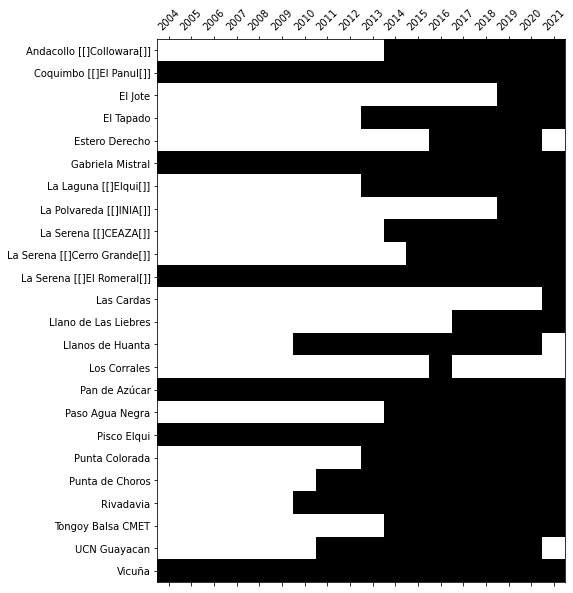

In [33]:

fig = plt.figure(figsize=(10,10))

ax = plt.axes()

im = ax.matshow(tiempo, cmap='gray_r')

anios = np.arange(0,tiempo.shape[1])


ax.set_xticks(anios)
ax.set_xticklabels(np.arange(min,2022), rotation=45)
ax.set_yticks(np.arange(len(lista_estaciones)))
ax.set_yticklabels(lista_estaciones)
plt.show()




Uno puede ver que para el año 2019 existe un mayor número de estaciones para llevar a cabo el análisis comparativo, por lo que se elige este año para la selección dejando de lado las estaciones: Las Cardas y Los Corrales. Se deja como hiperparámetros la fecha de inicio y final para el análisis.


**¿Qué temperatura?**

Hasta ahora se ha mencionado comparar temperaturas, pero los dataframes no poseen esta columna, sino que un conjunto de columnas con el nombre temperatura, pero indicando distintos "tipos" de temperaturas, por lo que en esta tarea se trabajará con temperatura en 1.5 m y 2 m para llevar a cabo el análisis (Este es un supuesto importante de considerar para futuras conclusiones)



In [34]:
fecha_inicio = '2019-05-01'
fecha_final  = '2019-05-15'
estacionesDataFramePorSemana = []
filtro_estaciones = ["Las Cardas", "Los Corrales"]
contador_1 = 0
contador_2 = 0
aux = pd.DataFrame()
for index, estacion in enumerate(estacionesDataFrame):

  if estacion['estacion'][0] in filtro_estaciones:
    print(estacion.estacion[0] + ' no tiene datos para el rango de fecha entre ' + fecha_inicio + ' y ' + fecha_final)
  elif "[Prom] Â°C Temperatura del Aire[1.5m]" in estacion:
    estacion = estacion[["[Prom] Â°C Temperatura del Aire[1.5m]", "estacion" ]]
    estacion = estacion[(estacion.index > fecha_inicio) & (estacion.index <= fecha_final)]
    estacionesDataFramePorSemana.append(estacion)
    contador_1 += 1
  elif "[Prom] Â°C Temperatura del Aire[2m]" in estacion:
    estacion = estacion[["[Prom] Â°C Temperatura del Aire[2m]", "estacion" ]]
    estacion = estacion[(estacion.index > fecha_inicio) & (estacion.index <= fecha_final)]
    estacionesDataFramePorSemana.append(estacion)
    contador_2 += 1
  else:
    print(estacion.estacion[0] + ' no tiene temperatura de aire')
print('Estaciones con 1.5 m ' + str(contador_1) )
print('Estaciones con 2.0 m ' + str(contador_2) )

Coquimbo [[]El Panul[]] no tiene temperatura de aire
Las Cardas no tiene datos para el rango de fecha entre 2019-05-01 y 2019-05-15
Los Corrales no tiene datos para el rango de fecha entre 2019-05-01 y 2019-05-15
Estaciones con 1.5 m 13
Estaciones con 2.0 m 8


A pesar de tener la temperatura en 1.5 y 2 metros, como la pregunta formulada en este notebook no se trata de temperatura sino de la **evolución de la temperatura en el día** es que se efectua la normalización de los datos. 
Se utiliza solo estaciones que no tengan NaN 

In [35]:
estacionesDataFramePorSemanaNormalizada = []
columna = estaciones.columns
for estaciones in estacionesDataFramePorSemana:
  estaciones.dropna(inplace = True)
  columna = estaciones.columns
  estaciones[columna[0]] = (estaciones[columna[0]]-estaciones[columna[0]].min())/(estaciones[columna[0]].max()-estaciones[columna[0]].min())
  estacionesDataFramePorSemanaNormalizada.append(estaciones)
  
  


In [36]:
estacionesDataFramePorSemanaNormalizada[0].head(3)

,[Prom] Â°C Temperatura del Aire[1.5m],estacion
Fecha,,
2019-05-01 01:00:00,0.683644,Andacollo [[]Collowara[]]
2019-05-01 02:00:00,0.680635,Andacollo [[]Collowara[]]
2019-05-01 03:00:00,0.751448,Andacollo [[]Collowara[]]


# Visualización de los Datos

A pesar de descartar dos estaciones, se descarta: Coquimbo [El Panul] por no tener datos en la fecha elegida. 

Los gráficos a continuación presentan la evolución en el día 

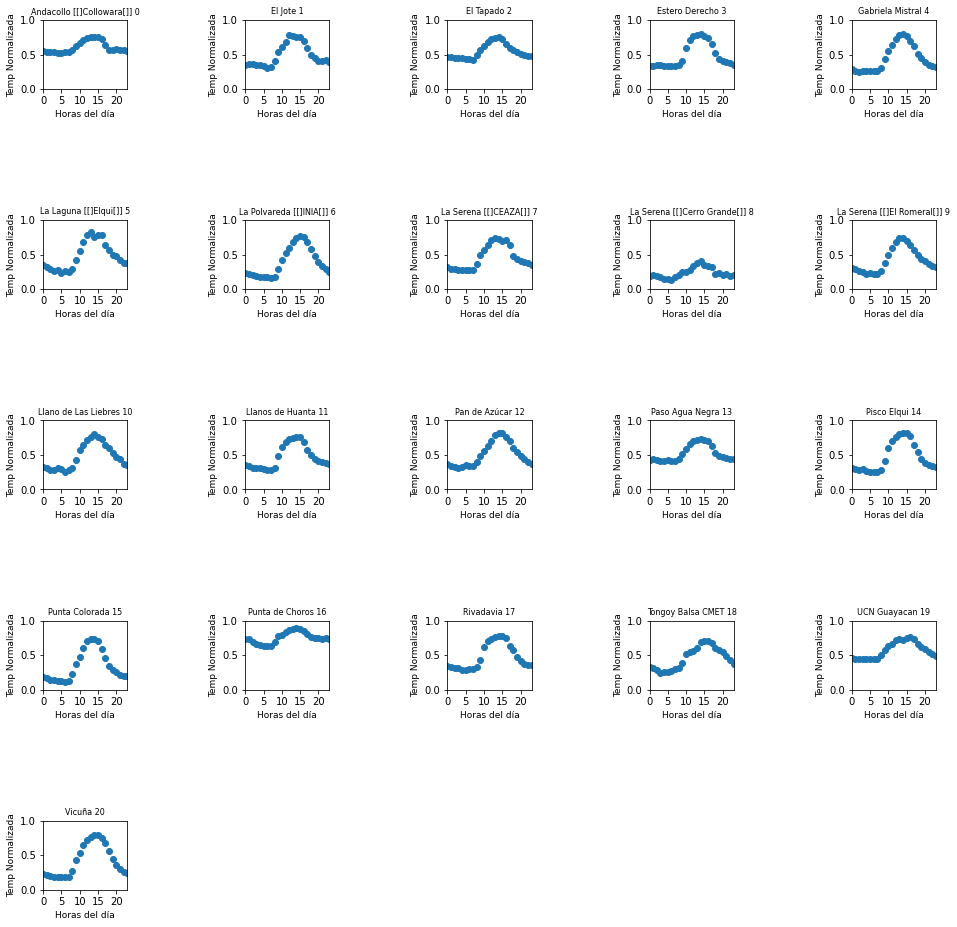

In [37]:

fig = plt.figure(figsize=(16,16))
fig.subplots_adjust(hspace=1.9, wspace=1.4)
for i in range(1,22):
    ax = fig.add_subplot(5, 5, i)
    dias = estacionesDataFramePorSemanaNormalizada[i-1].groupby(estacionesDataFramePorSemanaNormalizada[i-1].index.hour).mean()
    error = estacionesDataFramePorSemanaNormalizada[i-1].groupby(estacionesDataFramePorSemanaNormalizada[i-1].index.hour).std()
    ax.plot(dias.index, dias.values, 'o')
    ax.set_title(estacionesDataFramePorSemana[i-1]['estacion'][0] +' ' +str(i-1), fontsize=8)
    ax.set_ylim(0,1)
    ax.set_xlim(0,23)
    ax.locator_params(axis='x', nbins=5)
    ax.set_xlabel('Horas del día', fontsize=9)
    ax.set_ylabel('Temp Normalizada', fontsize=9)
plt.show()

De manera manual se realiza una clusterización, tomando en consideración los siguientes puntos 

1.   Curva casi constante en el tiempo
2.   Curva casi constante en el tiempo, pero con una leve subida despues de las 10AM 
3.   Curva con un cambio brusco entre las 10AM y 12PM
4.   Curva con una distribución "normal" suave 
5.   Curva con una distribución "normal" suave, pero con máximas no suave


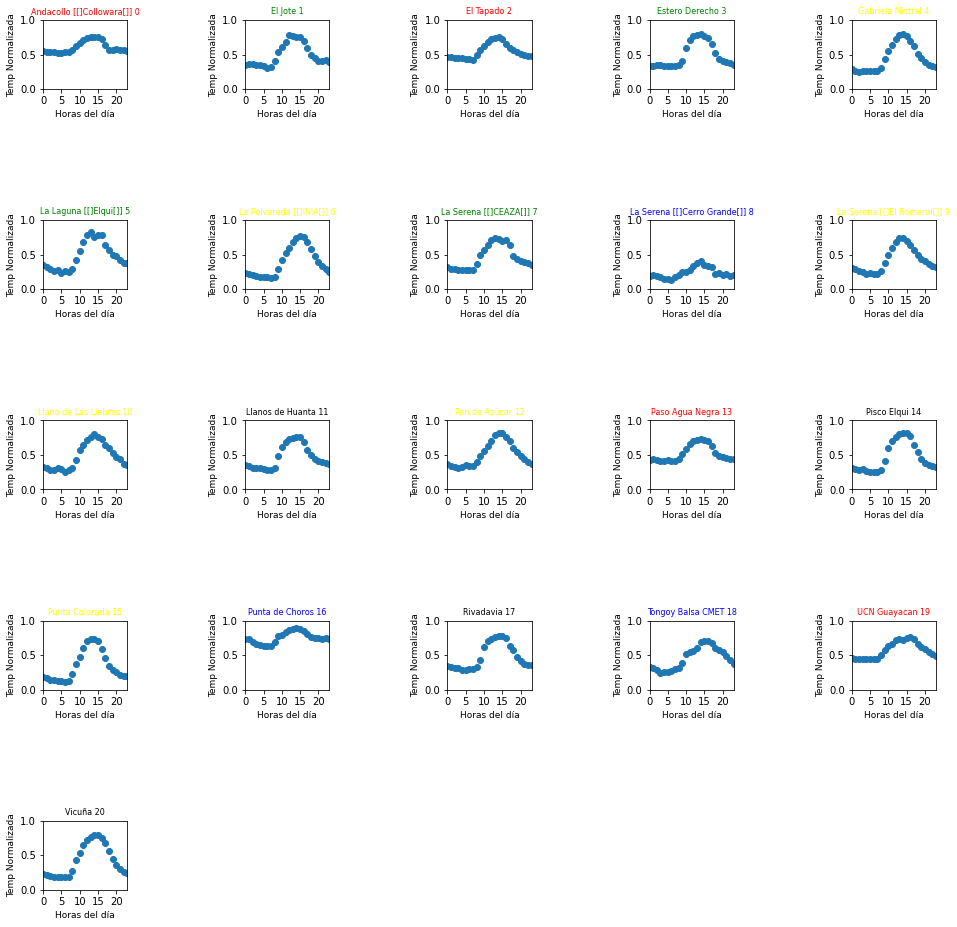

In [38]:
cluster_a = [11, 17, 14, 20]
cluster_b = [16, 18, 8]
cluster_c = [13, 19, 2, 0]
cluster_d = [12, 10, 4, 15, 6, 9]
cluster_e = [5, 1, 7, 3]
fig = plt.figure(figsize=(16,16))
fig.subplots_adjust(hspace=1.9, wspace=1.4)
for i in range(1,22):
    ax = fig.add_subplot(5, 5, i)
    dias = estacionesDataFramePorSemanaNormalizada[i-1].groupby(estacionesDataFramePorSemanaNormalizada[i-1].index.hour).mean()
    error = estacionesDataFramePorSemanaNormalizada[i-1].groupby(estacionesDataFramePorSemanaNormalizada[i-1].index.hour).std()
    ax.plot(dias.index, dias.values, 'o')
    if((i-1) in cluster_a):
      ax.set_title(estacionesDataFramePorSemana[i-1]['estacion'][0] +' ' +str(i-1), fontsize=8, color="black")
    if((i-1) in cluster_b):
      ax.set_title(estacionesDataFramePorSemana[i-1]['estacion'][0] +' ' +str(i-1), fontsize=8, color="blue")
    if((i-1) in cluster_c):
      ax.set_title(estacionesDataFramePorSemana[i-1]['estacion'][0] +' ' +str(i-1), fontsize=8, color="red")
    if((i-1) in cluster_d):
      ax.set_title(estacionesDataFramePorSemana[i-1]['estacion'][0] +' ' +str(i-1), fontsize=8, color="yellow")
    if((i-1) in cluster_e):
      ax.set_title(estacionesDataFramePorSemana[i-1]['estacion'][0] +' ' +str(i-1), fontsize=8, color="green")
    ax.set_ylim(0,1)
    ax.set_xlim(0,23)
    ax.locator_params(axis='x', nbins=5)
    ax.set_xlabel('Horas del día', fontsize=9)
    ax.set_ylabel('Temp Normalizada', fontsize=9)
plt.show()

In [39]:
lon = -70.616334
lat = -29.7530093
coordenadas_estaciones = [(-30.248700,-71.065300), # Andacollo
   (-30.405266,-70.279483), # El Jote
   ( -30.1583, -69.908179), # El Tapado
   (-30.38407, -70.412858), # Estado Derecho
   ( -29.97852, -71.080386), # Gabriela Mistral
   (-30.203112, -70.037224), # La Laguna Elqui
   ( -29.915015, -71.242214), # La Laguna Ceaza
    ( -30.9, -71.203505), # La Polvareda
   ( -29.938475, -71.223505), # Cerro Grande
   (-29.754064, -71.257442), # El Romeral
   (-30.257406, -69.936986), # Llano de las liebres
   (-29.827418, -70.354471), # LLano de huanta
   (-30.074646, -71.238945), # Pan de Azucar
   (-30.190704, -69.82553), # Paso Agua Negra
   (-30.129028, -70.494712), # Pisco Elqui
   (-29.3541129, -71.0328595), # Punta Colorada
   (-29.24724, -71.467969), # Punta de Choros
   (-29.96173, -70.539081), # Rivadavia
    (-30.348700,-71.665300), # Tongoy Balsa
   (-29.96663, -71.352844), # UCN Guayacan
   (-30.038318, -70.696553) # Vicuña
]

	

Con lo observado en las curvas uno puede ya responder la pregunta formulada como tarea de este trabajo: 

**¿Es la evolución de temperatura diaria la misma para cada estación? La respuesta es No.**

No obstante podemos tratar de intentar encontrar las posibles causas a este hecho, para ello se utiliza un mapa donde se encuentran estas estaciones 

UBICACION DE ESTACIONES


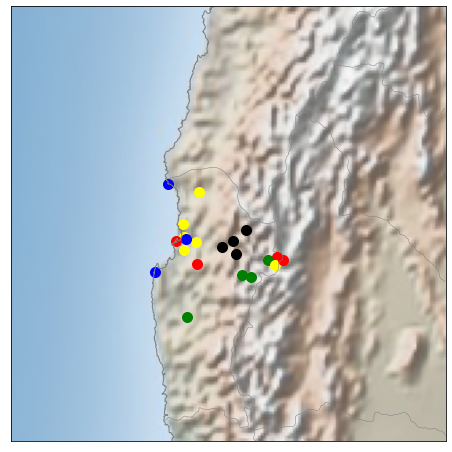

In [40]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='h', 
            lat_0= -29.75, lon_0=-70.6130093,
            width=6E5, height=6E5)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

lat = -29.97852
lon = -71.080386
# 2. scatter city data, with color reflecting population
# and size reflecting area

for i, coordenada in enumerate(coordenadas_estaciones):
  if(i in cluster_a):
    m.scatter(coordenada[1], coordenada[0], latlon=True, color="black", s=100, alpha=1)
  if(i in cluster_b):
    m.scatter(coordenada[1], coordenada[0], latlon=True, color="blue", s=100, alpha=1)
  if(i in cluster_c):
    m.scatter(coordenada[1], coordenada[0], latlon=True, color="red", s=100, alpha=1)
  if(i in cluster_d):
    m.scatter(coordenada[1], coordenada[0], latlon=True, color="yellow", s=100, alpha=1)
  if(i in cluster_e):
    m.scatter(coordenada[1], coordenada[0], latlon=True, color="green", s=100, alpha=1)

print('UBICACION DE ESTACIONES')

# Conclusión


- Las estaciones de monitoreo del Ceazamet en la provincia del Elqui no tienen la misma evolución diaria de temperatura

- Se logra determinar una relación entre evolución diaria de temperatura y ubicación geográfica de la estación

- Existen 4 estaciones (de color rojo) que a pesar de tener parecido en la evolución de temperatura no parece existir relación entre ellas espacialmente (Sin considerar el hecho de que pueda haber un factor de latitud como explicación)




Es importante señalar que este ha sido una prueba práctica sobre el proceso necesario que se debe realizar con respcto a: Limpieza, selección y visualización de datos utilizando la herramienta de Pandas.

No obstante, permite tener una idea preliminar sobre los desafios que implicaría llevar a cabo un análisis de interpolación de temperatura en la provincia del Elqui.
